In [1]:
import os, sys
import importlib

from utils import load, vis, models, models_LSTM, process

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
data_folder = "data/simplified/"
afg2 = map(lambda x : data_folder + x + '.csv', load.classes)

In [3]:
# Set training and test sets size
batch_size = 4
steps = int(10 * 16/batch_size)
test_size = int(1000*16/batch_size)

In [4]:
# initialize generator
data = process.SeqGenerator(afg2,100,batch_size)
gen2 = data.generateSeq()

In [5]:
from keras.models import model_from_json
# load json and create model
json_file = open('modelLSTM_32dp1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelLSTM_32dp1.h5")
print("Loaded model from disk")

Loaded model from disk


In [6]:
# compile model
loaded_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, None, 3)           12        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 48)          768       
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 48)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          15424     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 96)          18528     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 96)          0         
__________

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import numpy as np
x_test,y_test = next(gen2)
for i in range(99):
    x,y = next(gen2)
    x_test = np.concatenate((x_test,x),axis = 0)
    y_test = np.concatenate((y_test,y),axis = 0)
validate = (x_test,y_test)

In [9]:
# True Labels
y_true = np.argmax(y_test,axis =1)
# Test results
y_model = loaded_model.predict_classes(x_test)

In [10]:
# Storing correct and incorrect classification results
count_cor = 0
count_inc = 0
correct = []
incorrect = []
lbl_cor = []
inc_lbl_true = []
inc_lbl_model = []
idx = 0
for i in range(y_model.shape[0]):
    if y_model[i] == y_true[i]:
        correct.append(i)
        lbl_cor.append(y_model[i])
        count_cor += 1
    elif y_model[i] != y_true[i] and count_inc < 5:
        incorrect.append(i)
        inc_lbl_true.append(y_true[i])
        inc_lbl_model.append(y_model[i])
        count_inc += 1

In [11]:
# classes used
classes_1 = ["airplane","angel","basket","bear","belt","candle","crown","cat"]
classes_2 = ['bee','crab','drums','elephant','hospital','mouse','onion','tree']
classes_3 = ['book', 'camel', 'camera', 'carrot', 'matches', 'microwave', 'nose', 'toaster']
classes_4 = ['apple','cloud', 'dresser', 'drill','mug', 'pool', 'submarine', 'toilet']
classes = classes_1 + classes_2 + classes_3 + classes_4

In [12]:
def sketchplot(data,row):
    xy = data[row]
    x = xy[:,0]
    y = xy[:,1]
    return x,y

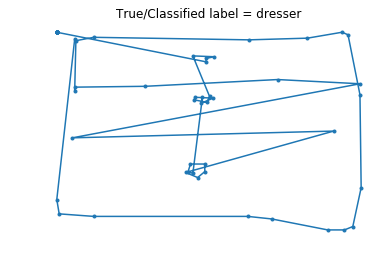

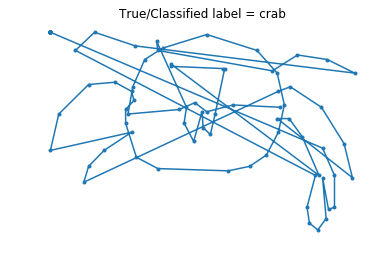

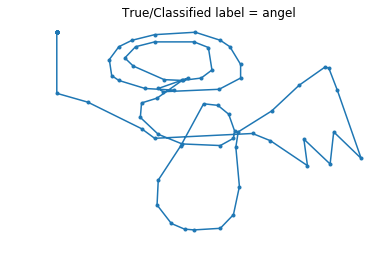

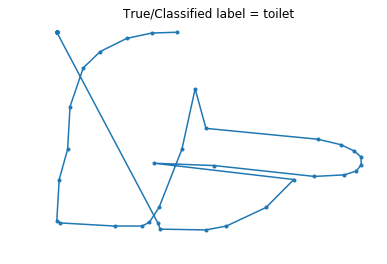

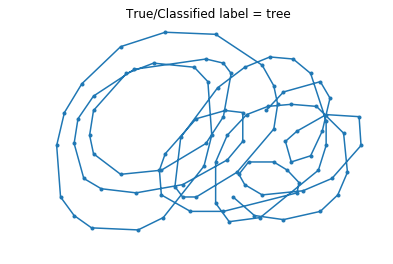

In [20]:
# Plot correct examples
for i in range(5):    
    idx = i
    plt.figure(i)
    true = classes[lbl_cor[idx]]
    x,y = sketchplot(x_test,correct[idx])
    plt.plot(x, -y, marker='.')
    plt.title('True/Classified label = ' + true)
    plt.axis('off')
    plt.savefig('Correct_'+true)

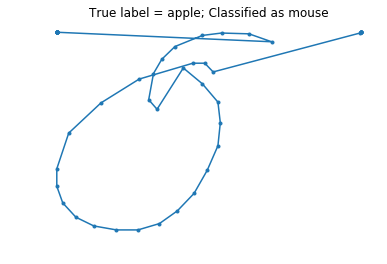

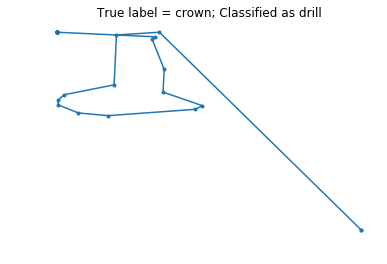

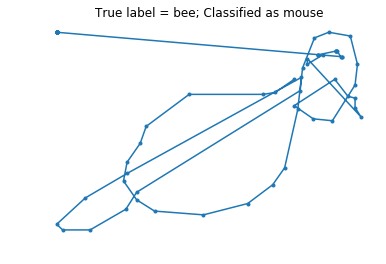

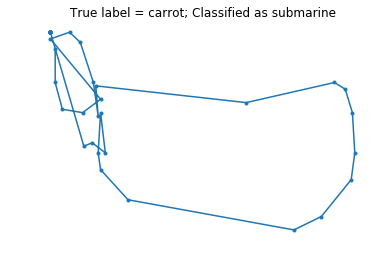

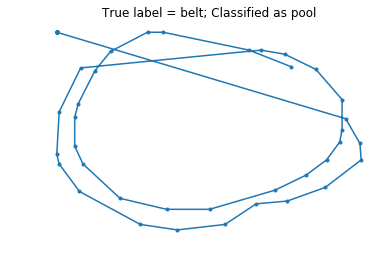

In [21]:
# Plot incorrect examples
for i in range(5):
    idx = i
    true = classes[inc_lbl_true[idx]]
    our_model = classes[inc_lbl_model[idx]]
    x,y = sketchplot(x_test,incorrect[idx])
    plt.figure(i)
    plt.plot(x, -y, marker='.')
    plt.title('True label = ' + true+'; Classified as '+our_model)
    plt.axis('off')
    plt.savefig('should_be_'+true+'_but_'+our_model)
